In [20]:
# import libraries
import qiskit as q
from qiskit import Aer
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter
%matplotlib inline

In [9]:
IBMQ.save_account('2dc71d5e4797d489ead93bf923203e9baec45e1183af52ac01b14f3b6cb4752699f8eb3708badd8baf1f379687ed337e16db1771e64c0b1962fa027f583d21ef')

configrc.store_credentials:WARNING:2020-09-26 11:29:11,971: Credentials already present. Set overwrite=True to overwrite.


In [10]:
IBMQ.load_account()

C:\Users\Daoudapc\Anaconda3\envs\QC\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
# Look at the existance backend
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [12]:
# Choose a backend
sim_backend = Aer.get_backend('qasm_simulator')

In [13]:
# Construct quantum circuit
circ = q.QuantumCircuit(4, 4)
circ.cz(0, 1)
circ.measure([0,1], [0,1])
circ.draw()

┌─┐   
q_0: ─■─┤M├───
      │ └╥┘┌─┐
q_1: ─■──╫─┤M├
         ║ └╥┘
q_2: ────╫──╫─
         ║  ║ 
q_3: ────╫──╫─
         ║  ║ 
c: 4/════╩══╩═
         0  1

In [16]:
job = q.execute(circ, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [17]:
job = q.execute(circ, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


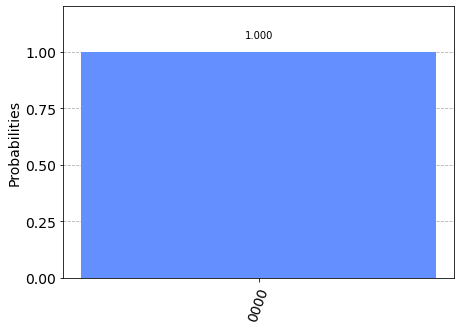

In [21]:
result = job.result()
counts = result.get_counts(circ)
plot_histogram([counts])

In [31]:
# integrate the parameter theta
theta = Parameter('θ')

n = 4

qc = q.QuantumCircuit(4, 4)


qc.cz(0, 1)
for i in range(n-1):
    qc.cz(i, i+1)
    
qc.barrier()
qc.rx(theta, range(4))
qc.barrier()

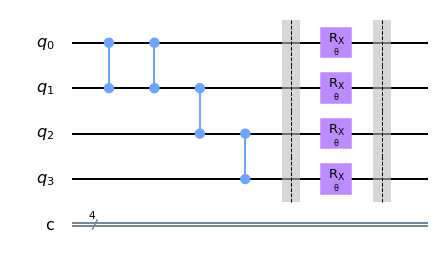

In [32]:
qc.draw('mpl')